# __Supervised Learning: Classification__

- Classification
- Applications of Classification
- Types of Classification
- Binary Classification
  * Logistic Regression
    * Mathematical Concept of Logistic Regression
    * Example with Breast Cancer Dataset
  * Performance Metrics Used in Classification
    * Significance of the Confusion Matrix
  * Naive Bayes Classifier
    * Mathematical Concept of Naive Bayes
    * Applying Naive Bayes Algorithm on Breast Cancer Dataset
  * K-Nearest Neighbors (KNN)
    * Applying K-Nearest Neighbors on Breast Cancer Dataset
    * Hyperparameter Tuning in KNN
  * Decision Tree
    * How Decision Trees Work
    * Metrics for Splitting
    * Pruning
    * Applying Decision Tree on Breast Cancer Dataset
    * Hyperparameter Tuning in Decision Tree
  * Support Vector Machine (SVM)
    * Applying SVM on Breast Cancer Dataset
    * Hyperparameter Tuning












## __Classification__ ##

Classification is a supervised machine learning technique where the model is trained to predict the class label of a given input data. It looks for the decision boundary, which divides the dataset into different classes.


Classification algorithms categorize data into distinct classes or categories, as illustrated by the separation of Class A and Class B in the graph.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Classification.png" width = 400 height = 400 />

### __Applications of Classification__

**1.Healthcare:** Classification models diagnose diseases, assess patient risk, and identify medical conditions from diagnostic tests or imaging data. These tasks involve categorizing patients or medical conditions into predefined classes.

**2.Finance:** Banks and financial institutions use classification algorithms for credit scoring and fraud detection. These applications involve classifying individuals into categories such as "high risk" or "low risk" for credit scoring, and "fraudulent" or "non-fraudulent" for fraud detection.

**3.Marketing:** Classification aids in customer segmentation and target marketing. It helps businesses identify potential customers and tailor marketing strategies by categorizing customers based on their behavior, preferences, and demographics.

**4.Retail:** In retail, classification algorithms are crucial for managing inventory, forecasting demand, and personalizing product recommendations. By classifying products and customer preferences, these algorithms optimize stock levels and provide custom recommendations to the customers.

**5.Manufacturing:** Classification is essential for quality control and fault detection in manufacturing. It identifies product defects, classifies items as faulty or non-faulty, and optimizes production processes to minimize downtime.

### __Types of Classification__

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Classification_Part_1/image_1.jpg" width = 600 height = 600 />

## __Binary Classification__

Binary classification is the most simple type of classification, where the model predicts one of two possible outcomes. For example, yes or no, true or false, spam or not spam.

Some popular algorithms used for binary classification are:

- Logistic Regression
- Naïve Bayes
- K-Nearest Neighbors (KNN)
- Decision Trees
- Support Vector Machines (SVM)

While these methods excel in binary settings, they are equally capable of handling multi-class classification tasks. This versatility allows them to be used in a wider range of applications, such as recognizing multiple categories of objects in images or predicting several types of customer behavior.

### __Logistic Regression:__

**Logistic regression** is a supervised machine learning technique primarily used for binary classification. In this method, we apply the sigmoid function to the linear combination of independent variables/predictors (features). This produces a probability value between 0 and 1. This probability represents the likelihood of a datapoint belonging to a specific class (e.g., positive or negative outcome).


If the estimated probability is
greater than 0.5, then the model predicts that the instance belongs to a positive class labeled “1” or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### **Mathematical Concept of Logistic Regression:**

**1. Logistic Function (Sigmoid Function):**
The core of logistic regression is the logistic function, also known as the sigmoid function (denoted by $\sigma(z)$), which maps any real-valued number into the range (0, 1).

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


Where,
 `z` is a linear combination of the input features. This function outputs the probability of the input belonging to the positive class (class 1).

**2. Linear Combination of Inputs:**
The input features 𝑋 are combined linearly using weights 𝑤 and a bias term 𝑏:

$$
z = w \cdot X + b
$$

**3. Prediction:**
The logistic regression model predicts the probability of the class being positive or negative (class 1 or class 0) as:

$$
\sigma(z) = P(y=1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-(w \cdot X + b)}}
$$


To make a final binary decision, a threshold (usually 0.5) is applied to this probability. If 𝜎(𝑧)≥0.5, the prediction is class 1; otherwise, it's class 0.

**4. Cost Function:**
The cost function used in logistic regression is the __binary cross-entropy (log loss)__, which measures the discrepancy between the predicted probabilities and the actual class labels:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_{(i)} \log(\hat{y}_{(i)}) + (1 - y_{(i)}) \log(1 - \hat{y}_{(i)}) \right]
$$


Where
𝑚 is the number of training examples, $y_{(i)}$ is the true label, and $\hat{y}_{(i)}$ is the predicted probability for the 𝑖-th example.

**5. Optimization:**
The goal is to find the weights 𝑤 and bias 𝑏 that minimize the cost function. This is typically done using gradient descent.

#### **Example with Breast Cancer Dataset**

#### **Dataset Description:**
 The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in the field of machine learning, particularly in classification problems related to medical diagnosis.This dataset consists of breast cancer cases derived from a group of patients who underwent surgery and had their breast mass tissue sampled.

**Number of Instances:** It contains 569 instances, each representing an individual sample of breast tissue.

**Number of Attributes:** There are 30 numeric attributes computed from digitized images of the tissue samples. These attributes are measurements of the cell nuclei present in the images.

**The attributes include:**

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)
- The target variable, `diagnosis`, indicates the cancer type, which can be "M" (Malignant) or "B" (Benign). The objective is to predict whether the tissue sample is benign or malignant


**Note:** We will use this dataset to explore and compare various binary classification algorithms, examining how their performance varies depending on the type and implementation of each algorithm, accompanied by their mathematical explanations.




Let's first start with the implementation of **logistic regression**, but make sure to conduct proper data preprocessing to make it suitable for modeling. This step may include 
- handling missing values
- scaling features, and
- encoding categorical variables

In [453]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [455]:
breast_cancer_data = pd.read_csv('datasets/Breast_cancer_dataset.csv')
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [457]:
breast_cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [459]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [461]:
# Summary statistics
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [463]:
# Check for missing values
breast_cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### __Observation:__

- There are no null/missing values in the dataset

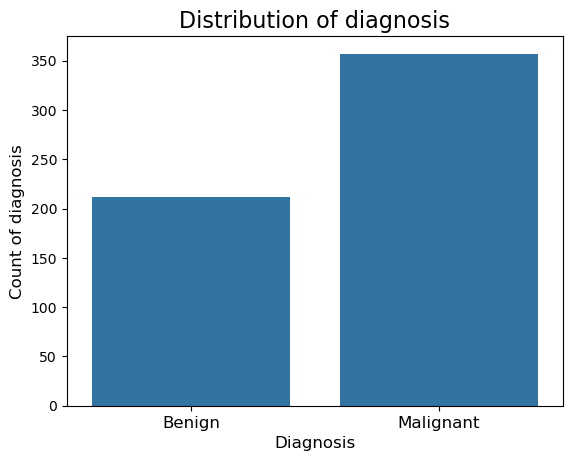

In [482]:
# Distribution of the target variable

sns.countplot(x="diagnosis",data = breast_cancer_data)
plt.title("Distribution of diagnosis", fontsize=16, c="k")
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Count of diagnosis", fontsize=12)
plt.xticks([0, 1], ['Benign', 'Malignant'], fontsize=12)
plt.show()

##### __Observation:__
- The plot shows the distribution of the target variable `diagnosis`, highlighting the count of benign and malignant cases.

In [485]:
breast_cancer_data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### __Next Steps:__

- Remove unwanted columns like `Unnamed: 32` and `id`

In [662]:
# Remove unwanted columns from the dataset

breast_cancer_data = breast_cancer_data.drop(["Unnamed: 32", "id"],axis=1)
breast_cancer_data

KeyError: "['Unnamed: 32', 'id'] not found in axis"

In [ ]:
breast_cancer_data.isnull().sum()

#### __Next Steps:__
 
Plot a correlation heatmap to understand the relationship between features

 - The heatmap visualizes the correlation between different features in the dataset, helping identify highly correlated pairs.

In [ ]:
# Correlation heatmap

plt.figure(figsize=(12,8))
c = breast_cancer_data.corr(numeric_only=True)
sns.heatmap(c, annot=True,fmt=".1f")
plt.title("Correlation between dataset", fontsize=17, c="k")
plt.show()

##### __Observation:__

- High Correlations: Several pairs of features exhibit strong positive correlations.
For example, `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated with each other. This is expected as these are all measures of size and dimensions of the detected tumors.

- Feature Groups: Features related to the "worst" (largest value of these features for each image), "mean", and "error" (standard error) calculations are grouped together, indicating that similar types of measurements are highly correlated. For example, `radius_worst`, `perimeter_worst`, and `area_worst` also show very high positive correlations.

- Clinical Relevance: High correlations between features like `concavity_mean` and `concave points_mean` suggest that more concave portions of the tumor outline correspond to more frequent concave points, which are relevant characteristics for diagnosing malignancy of the sample.

#### __Next Steps:__

- Convert Categorical variable `diagnosis` into one-hot encoded numerical variable with benign instances assigned 0 and malignant 1.

In [ ]:
# Transform diagnosis column into numeric

from sklearn.preprocessing import LabelEncoder

In [493]:
Encoder = LabelEncoder()
breast_cancer_data["diagnosis"] = Encoder.fit_transform(breast_cancer_data["diagnosis"])
breast_cancer_data["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [495]:
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### __Next Steps:__

- Build a Logistic regression model.
- The data is split into training and testing sets with an 80-20 split.

In [498]:
# Split data into feature(X) and target(y)

X = breast_cancer_data.drop(columns = "diagnosis")
y = breast_cancer_data["diagnosis"]

# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [500]:
print(len(y_train))
print(len(y_test))

455
114


#### __Next Steps:__

Use `sklearn.pipeline` to streamline the preprocessing and training process

- The features in the training and testing sets are standardized to have a mean of 0 and standard deviation of 1.
- A logistic regression model is trained using the standardized training data.

In [503]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [505]:
# Predict on the training and testing set
y_pred_train_log_reg = pipeline.predict(x_train)
y_pred_test_log_reg = pipeline.predict(x_test)

# Predict probabilities on the testing set
y_pred_test_prob_log_reg = pipeline.predict_proba(x_test)[:, 1]

#### __Next Steps:__

Create a DataFrame with actual labels, predicted scores, and predicted probabilities, for test data

- The probabilities of the positive class (malignant) for the testing set are obtained, useful for further evaluation metrics like ROC-AUC.


In [508]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_prob_log_reg,
    'Predicted Label': y_pred_test_log_reg,
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Probability,Predicted Label
204,0,0.113590,0
70,1,0.999991,1
131,1,0.996921,1
431,0,0.000510,0
540,0,0.000061,0


In [510]:
# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Logistic Regression
Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


##### __Observations:__

- **Training Accuracy (98.68%):**
  Indicates that the logistic regression model correctly classifies 98.68% of the training instances.
  A high training accuracy suggests that the model has learned the patterns present in the training data well.

- **Testing Accuracy (97.37%):** This indicates that the model correctly classifies 97.37% of the instances in the test set, which was not seen during training.
  High testing accuracy suggests that the model generalizes well to new, unseen data.

- **Model Performance:** Both training and testing accuracies are high, indicating good overall performance of the logistic regression model.
  The slight drop from training to testing accuracy (from 98.68% to 97.37%) is expected and acceptable, showing that the model generalizes well without overfitting.

- **Check for Overfitting:** If the training accuracy were significantly higher than the testing accuracy, it would suggest overfitting. However, in this case, the difference is small, indicating that the model is not overfitting.

#### __Logistic Regression with custom threshold value__

Default threshold value - `0.5`.

In [520]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [522]:
# Predict probabilities on the testing set
y_pred_test_prob_log_reg = pipeline.predict_proba(x_test)[:, 1]

In [524]:
threshold = 0.3

y_pred_custom = (y_pred_test_prob_log_reg >= threshold).astype(np.int32)

In [526]:
from sklearn.metrics import classification_report

In [528]:
print(f"Classification report with new threshold: {threshold}")
print(classification_report(y_test, y_pred_custom))

Classification report with new threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [530]:
threshold_default = 0.5

y_pred_custom_default = (y_pred_test_prob_log_reg >= threshold_default).astype(np.int32)

In [532]:
print(f"Classification report with new threshold: {threshold_default}")
print(classification_report(y_test, y_pred_custom_default))

Classification report with new threshold: 0.5
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## __Performance Metrics Used in Classification__ ##

A performance evaluation matrix, often referred to as a confusion matrix in the context of classification problems, is a tool used to assess the performance of a predictive model by comparing the actual outcomes with the predicted outcomes.

- It is a tabular representation that allows you to visualize the accuracy and errors of the model in detail.

A __confusion matrix__ is typically a 2x2 matrix as shown below:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/Basic-Confusion-matrix.webp" width=300 height=300 />

The matrix includes the following components:
- **True Positive (TP):** The number of instances where the model correctly predicted the positive class.
- **True Negative (TN):** The number of instances where the model correctly predicted the negative class.
- **False Positive (FP):** The number of instances where the model incorrectly predicted the positive class (Type I error).
- **False Negative (FN):** The number of instances where the model incorrectly predicted the negative class (Type II error)

### __Significance of the Confusion Matrix__

The confusion matrix provides the foundation for various evaluation metrics, which are crucial for understanding different aspects of model performance. These metrics include:

- Accuracy
- Precision
- Recall(Sensitivity or True Positive Rate)
- F1 Score
- Specificity(True Negative Rate)

#### __Accuracy__

The ratio of correctly predicted instances (both positive and negative) to the total instances.

  
  $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$


Where:
   - \(TP\) = True Positives
   - \(TN\) = True Negatives
   - \(FP\) = False Positives
   - \(FN\) = False Negatives

#### __Precision__

The ratio of correctly predicted positive instances to the total predicted positive instances.
- It indicates the quality of positive predictions.
- It is a performance metric used for pattern recognition and classification in machine learning.
- It is a good metric when the cost of a false positive is high.

   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

#### __Recall (Sensitivity or True Positive Rate)__

The ratio of correctly predicted positive instances to all actual positive instances.

- It measures the model's ability to detect positive samples. The higher the recall, the more positive samples it detects.
- It is a very useful metric when the cost of a false negative is high.
- Out of all actual positive values, how many the model classified as positive. Here, FN are actual positive valus which have been incorrectly classifed as negative by the model.
- This is from Class 1's perspective.

$$ \text{Recall} = \frac{\text{Model Predicted postives}}{\text{All Actual Positives}} $$

Formulae:

   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

#### __Specificity (True Negative Rate)__

The ratio of correctly predicted negative instances to all actual negative instances.
- It indicates how well the model can identify negative instances.
- Out of all negative values, how much the model classified as negative. Here, FP are actual negative values which have been incorrectly classified as positive by the model.
- This is from Class 0's perspective.

$$ \text{Specificity} = \frac{\text{Model Predicted negatives}}{\text{All Actual Negatives}} $$

Formulae:

   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

#### __F1 Score__

The harmonic mean of precision and recall. It provides a single metric that balances the trade-off between precision and recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

#### __ROC (Receiver Operating Characteristics) Curve__

An ROC curve is a graphical representation of a classification model’s performance across different classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR) or Recall:
$$ \text{TPR} = \frac{TP}{TP + FN} $$

False Positive Rate (FPR):
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

- TPR will lead to benefits.
- FPR will lead to costs.


#### __AUC-ROC curve__

The AUC-ROC curve is an essential tool used for evaluating the performance of binary classification models. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds showing how well a model can distinguish between two classes such as positive and negative outcomes.

It provides a graphical representation of the model’s ability to distinguish between two classes like positive class for presence of a disease and negative class for absence of a disease.

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

------

**Finding the Optimal Threshold:**

The default threshold for many classification algorithms is 0.5, meaning if the predicted probability is greater than 0.5, the instance is classified as positive. However, this threshold may not always be optimal, especially in cases with skewed class distributions or when the costs of false positives and false negatives are unequal.

$$ \text{J} = \text{Sensitivity} + \text{Specificity} - 1 $$

- __J = 1__: Best Case.
- __J = 0__: Random guess
- __J < 0__: Worst Case 

**Methods to Find the Optimal Threshold:**

1. *Maximizing Youden’s J Statistic*:

  Youden's J statistic is defined as
  $J=TPR−FPR$. The optimal threshold is where this statistic is maximized. This method balances the TPR and FPR, aiming to maximize the true positives while minimizing the false positives.

2. *Closest Point to (0, 1)*:

  Another method is to find the point on the ROC curve that is closest to the top-left corner (0, 1), representing the ideal classifier with TPR = 1 and FPR = 0.

#### __AUC (Area Under the ROC Curve)__

The AUC is a single scalar value that summarizes the overall performance of a classifier.

AUC Value:
- An AUC of 0.5 suggests no discrimination, meaning the model performs no better than random chance.
- An AUC of 1.0 indicates perfect discrimination, meaning the model perfectly distinguishes between positive and negative classes.

#### __Lets derive the confusion matrix and ROC-AUC for the Logistic regression and understand more about the performance of the model:__

In [552]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [554]:
conf_matrix = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[70  1]
 [ 2 41]]


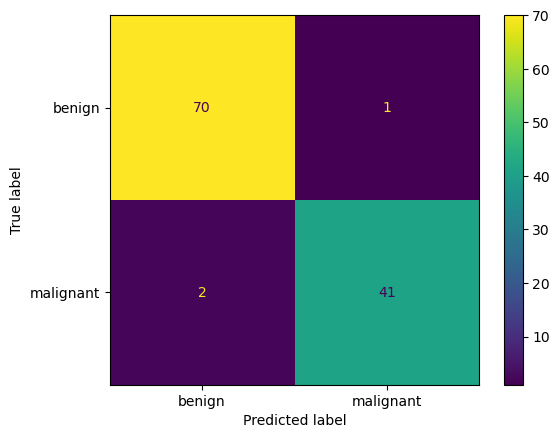

In [556]:
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["benign", "malignant"])

# display matrix
cm_display.plot()
plt.show()

- __True Positives (TP):__ The model correctly predicted 41 instances as "malignant" when they were indeed malignant. This indicates that there were 41 true positive predictions.

- __True Negatives (TN):__ The model correctly predicted 70 instances as "benign" when they were indeed benign. This shows 70 true negative predictions.

- __False Positives (FP):__ The model incorrectly predicted 1 instance as "malignant" when it was actually benign. This is a false positive, also known as a Type I error.

- __False Negatives (FN):__ The model incorrectly predicted 2 instances as "benign" when they were actually malignant. This is a false negative, also known as a Type II error.

#### __The classification report provides detailed metrics such as `precision`, `recall`, `F1-score`, and `support` for each class.__

In [560]:
# Print classification report

print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_log_reg))

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### __Logistic Regression Classification Report:__

1. __Class 0 (Negative Class)__

    - __Precision: 0.97__: 97% of the instances predicted as class 0 are actually class 0.
    - __Recall: 0.99__: 99% of the actual class 0 instances are correctly predicted as class 0.
    - __F1-Score: 0.98__: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Here, the F1-score is 0.98, indicating excellent performance.
    - __Support: 71__: There are 71 actual instances of class 0 in the test set.

2. __Class 1 (Positive Class)__

    - __Precision: 0.98__: 98% of the instances predicted as class 1 are actually class 1.
    - __Recall: 0.95__: 95% of the actual class 1 instances are correctly predicted as class 1.
    - __F1-Score: 0.96__: The F1-score for class 1 is 0.96, indicating very good performance.
    - __Support: 43__: There are 43 actual instances of class 1 in the test set.

3. __Overall Metrics__

    - __Accuracy: 0.97__: The overall accuracy of the model, indicating that 97% of the total instances are correctly classified.
    - __Macro Average__: Macro average calculates the metric independently for each class and then takes the average, treating all classes equally. It is useful when you have imbalanced classes.
    - __Weighted Average__: Weighted average takes into account the support (the number of true instances for each class) to calculate the average. It is more representative of the performance on imbalanced datasets.

#### __Plot the ROC curve__

- The ROC curve shows the trade-off between true positive rate and false positive rate at various threshold settings. The AUC value indicates the model's ability to discriminate between positive and negative classes.

**Parameters used in plotting the ROC curve:**

`plt.figure(figsize=(8, 6))`: Creates a new figure of size 8x6 inches.

`plt.plot(fpr, tpr, ...)`: Plots the ROC curve with FPR on the x-axis and TPR on the y-axis. The curve is blue with a line width of 2.

`plt.plot([0, 1], [0, 1], ...)`: Plots a grey dashed diagonal line as a reference, representing a random classifier with no discrimination capability (AUC = 0.5).

`plt.xlim([0.0, 1.0])` and `plt.ylim([0.0, 1.05])`: Sets the limits for the x and y axes.

`plt.xlabel('False Positive Rate')` and `plt.ylabel('True Positive Rate')`: Labels the axes.

`plt.title('Receiver Operating Characteristic (ROC) Curve')`: Sets the plot title.

`plt.legend(loc='lower right')`: Adds a legend to the plot at the lower right corner, displaying the AUC value.

`plt.show()`: Displays the plot.

In [565]:
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)

In [567]:
# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
roc_auc

0.99737962659679

In [569]:
# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.4848


In [571]:
youden_j

array([0.        , 0.02325581, 0.95348837, 0.93940387, 0.96265968,
       0.87815264, 0.90140845, 0.        ])

In [573]:
optimal_threshold_index

4

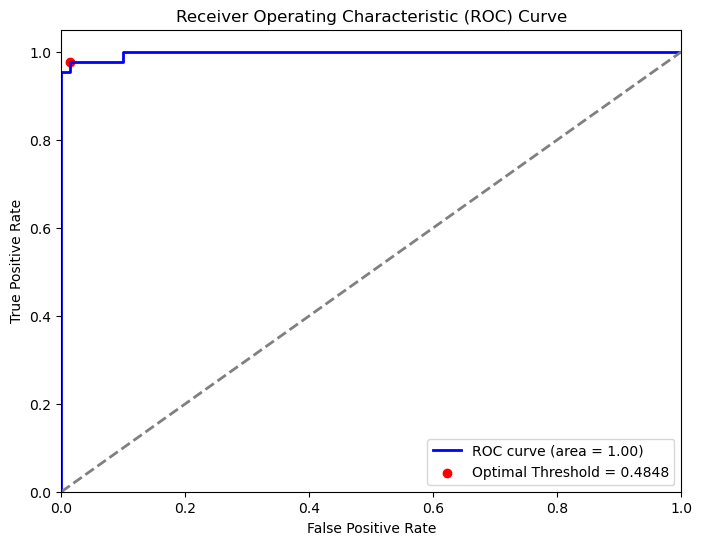

In [575]:
# Plot the ROC curve with the optimal threshold marked

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### __Observation:__

- The ROC curve in the image reaches the top-left corner (TPR = 1, FPR = 0), which indicates a perfect classification performance. The model perfectly distinguishes between the positive and negative classes at various threshold settings.

- The ROC curve for the logistic regression model has AUC of 1.00. This indicates that the model has perfect discriminatory power. An AUC of 1 means the model correctly classifies all positive and negative instances without error.

- The Optimal threshold of 0.4867 defines the decision boundary for the classifier. Probabilities above this value indicate a stronger belief that an instance belongs to the positive class, whereas probabilities below this value indicate a stronger belief that an instance belongs to the negative class.

## __Naive Bayes Classifier__

- Naive Bayes is a probabilistic classifier based on Bayes' Theorem. Naive Bayes is called naive because it assumes that the input variables are independent of each other. This is a strong assumption and unrealistic for real data.

- It is particularly suited for large datasets and is widely used for binary and multi-class classification tasks.

- It is widely used for text classification, sentiment analysis, etc.

### **Mathematical Concept of Naive Bayes:**

**Bayes' Theorem:**
Naive Bayes relies on Bayes' Theorem, which states

$$ P(A|B) = \frac{P(B|A) \times P(A)}{P(B)} $$

P(A), P(B) are the independent probabilities of A and B

P(B|A) is the probability of B given A

P(A|B) is the probability of A given B

**Bayes' theorem:** It calculates the probability of an event occurring, given that another event has already taken place.

### __Applying Naive Bayes Algorithm on Breast Cancer Dataset__

`x_train`, `y_train`, `x_test` and `y_test` are taken from the previous data split done on Breast cancer dataset

Use `sklearn.pipeline` to perform preprocessing and training on the data

In [585]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [587]:
# Define the pipeline
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Fit the pipeline on the training data
pipeline_nb.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])

In [589]:
#Predict on the training and testing set
y_pred_train_nb = pipeline_nb.predict(x_train)
y_pred_test_nb = pipeline_nb.predict(x_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_nb = pipeline_nb.predict_proba(x_test)[:, 1]


Naïve Bayes:
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9649122807017544


##### __Observation:__

The training accuracy (93.63%) and testing accuracy (96.49%) are relatively close to each other. This suggests that the model is not overfitting to the training data, as the performance on the testing set is slightly better or comparable to the training set.

In [592]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_prob_nb,
    'Predicted Label': y_pred_test_nb
})

results_df.head()

,Actual Label,Predicted Probability,Predicted Label
204,0,1.349483e-09,0
70,1,1.000000e+00,1
131,1,1.000000e+00,1
431,0,9.801091e-12,0
540,0,8.102568e-15,0


##### __Observation:__

- The Naive Bayes classifier computes the probability of a class given the input features by multiplying the individual conditional probabilities of each feature.

- Internally, many Naive Bayes implementations use logarithms to prevent numerical underflow when multiplying many small probabilities. The extreme values observed might be a result of the conversion back from logarithmic space to probability space.


Confusion Matrix:
[[70  1]
 [ 3 40]]


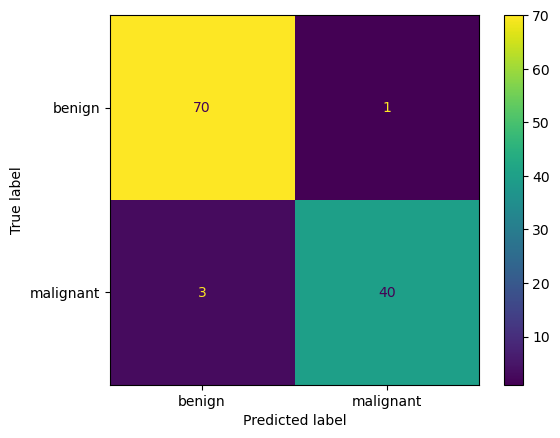

In [595]:
# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

**True Positives (TP)**: The model correctly predicted 40 instances as malignant when they were indeed malignant.

**True Negatives (TN)**: The model correctly predicted 70 instances as benign when they were indeed benign.

**False Positives (FP)**: The model incorrectly predicted 1 instance as malignant when it was actually benign. This is also known as a Type I error.

**False Negatives (FN)**: The model incorrectly predicted 3 instances as benign when they were actually malignant. This is also known as a Type II error.

In [598]:
# Print classification report
print("\t\tNaïve Bayes Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_nb))

		Naïve Bayes Classification Report:
		-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### __Naive Bayes Classification Report:__

**Class 0 (Negative Class)**
- **Precision: 0.96 :** 96% of the instances predicted as class 0 are actually class 0.
- **Recall: 0.99 :** 99% of the actual class 0 instances are correctly predicted as class 0.
- **F1-Score: 0.97 :** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Here, the F1-score is 0.97, indicating excellent performance.
- **Support: 71 :** There are 71 actual instances of class 0 in the test set.

**Class 1 (Positive Class)**
- **Precision: 0.98 :** 98% of the instances predicted as class 1 are actually class 1.
- **Recall: 0.93 :** 93% of the actual class 1 instances are correctly predicted as class 1.
- **F1-Score: 0.95 :** The F1-score for class 1 is 0.95, indicating very good performance, although slightly lower than class 0.
- **Support: 43 :** There are 43 actual instances of class 1 in the test set.

**Overall Metrics**
- **Accuracy: 0.96 :** The overall accuracy of the model, indicating that 96% of the total instances are correctly classified.
- **Macro Average :** Macro average calculates the metric independently for each class and then takes the average, treating all classes equally. It is useful when you have imbalanced classes.
- **Weighted Average :** Weighted average takes into account the support (the number of true instances for each class) to calculate the average. It is more representative of the performance on imbalanced datasets.

In [601]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)

# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
roc_auc

0.99737962659679

In [603]:
# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.0126


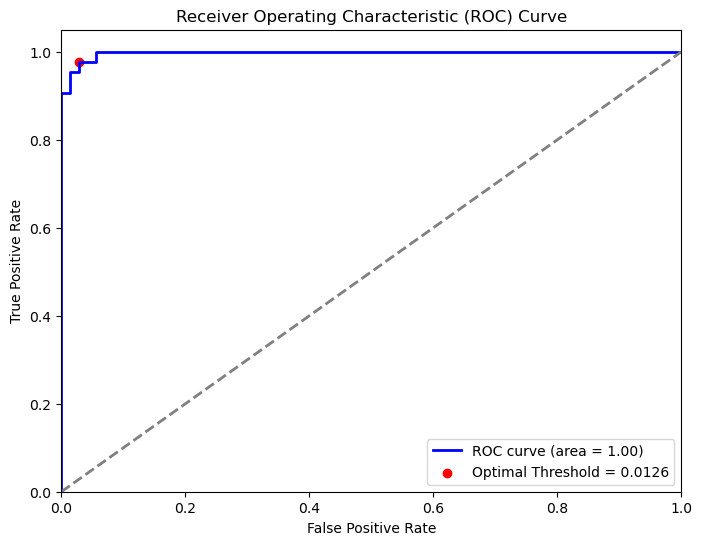

In [605]:
# Plot the ROC curve with the optimal threshold marked

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### __Observation:__

- The ROC curve for the Naive Bayes classifier demonstrates outstanding performance, with an AUC of 1.00 indicating perfect classification ability on the breast cancer dataset.

- This implies that the model is highly effective in distinguishing between benign and malignant cases with no errors.

- Optimal threshold is 0.0126. Some models, such as Naive Bayes, often produce uncalibrated probabilities that tend to be extreme (close to 0 or 1). This can result in needing a very low threshold to balance sensitivity and specificity effectively.

## __K-Nearest Neighbors (KNN)__

The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

- During the training phase, the KNN algorithm retains the entire training dataset as a reference. For predictions, it computes the distance between the input data point and all training examples using a selected distance metric, such as Euclidean distance, as illustrated in the diagram below:

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/KNN.png" width = 700 height = 700 />

**The following is a step-by-step approach to KNN algorithm:**

**Step 1:** Load the training and test data.

**Step 2:** Choose the value of K, which represents the number of nearest neighbors to consider. (K can be any positive integer)

**Note:** The optimal value for K will depend on the specific dataset and the problem being solved. It's often determined through cross-validation.

**Step 3:** For every point in the test data, do the following:

- Calculate the distance between the test data point and each point in the training dataset using a distance metric such as Euclidean, Manhattan, or Hamming distance.
- Sort the calculated distances in ascending order.
- Select the top K closest data points (smallest distances) from the sorted list.
- Assign the most frequent class (mode) among these K nearest neighbors to the test data point.

### __Applying K-Nearest Neighbors on Breast Cancer Dataset__

In [609]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, Normalizer

In [629]:
pipeline_knn = Pipeline([
    ('normalizer', Normalizer()),   # Normalize the data
    ('scaler', StandardScaler()),   # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=3)) # KNN classifier
])
pipeline_knn.fit(x_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()), ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [631]:
# Predict on the training and testing set
y_pred_train_knn = pipeline_knn.predict(x_train)
y_pred_test_knn = pipeline_knn.predict(x_test)

In [633]:
# Calculate training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nK-Nearest Neighbors (KNN)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_knn = pipeline_knn.predict_proba(x_test)[:, 1]


K-Nearest Neighbors (KNN)
Training Accuracy: 0.978021978021978
Testing Accuracy: 0.9824561403508771


In [635]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_prob_knn,
    'Predicted Label': y_pred_test_knn
})

results_df.head()

,Actual Label,Predicted Probability,Predicted Label
204,0,0.0,0
70,1,1.0,1
131,1,1.0,1
431,0,0.0,0
540,0,0.0,0


In [637]:
len(results_df[(results_df["Actual Label"] == 1) & (results_df["Predicted Label"] == 1)])

42

Confusion Matrix:
[[70  1]
 [ 1 42]]


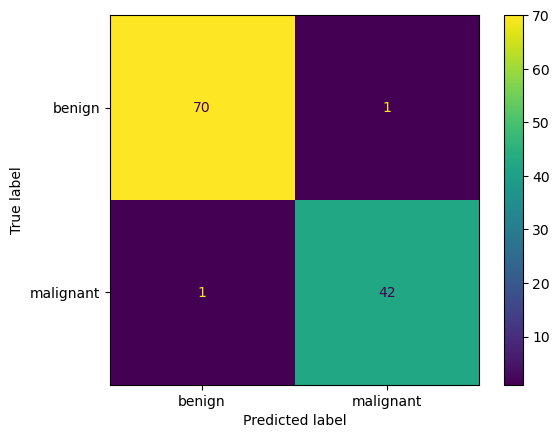

In [639]:
# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()


**True Positives (TP):** The model correctly predicted 40 instances as "malignant" (positive class) when they were indeed malignant.

**True Negatives (TN):** The model correctly predicted 68 instances as "benign" (negative class) when they were indeed benign.

**False Positives (FP):** The model incorrectly predicted 3 instances as "malignant" (positive class) when they were actually benign. This is a type I error.

**False Negatives (FN):** The model incorrectly predicted 3 instances as "benign" (negative class) when they were actually malignant. This is a type II error.

In [642]:
# Print classification report
print("\t\tK-Nearest Neighbors Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_knn))

		K-Nearest Neighbors Classification Report:
		-----------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### __KNN Classification Report:__

**Class 0 (Benign):**
- **Precision: 0.96** Of all the instances predicted as class 0, 96% were correctly classified. Precision measures the accuracy of the positive predictions.
- **Recall: 0.96** Of all the actual instances of class 0, 96% were correctly identified by the model. Recall measures the model's ability to find all the relevant cases within a class.
- **F1-Score: 0.96** The F1-score is the harmonic mean of precision and recall. An F1-score of 0.96 indicates a good balance between precision and recall for class 0.
- **Support: 71** There are 71 instances of class 0 in the test dataset.

**Class 1 (Malignant):**
- **Precision: 0.93** Of all the instances predicted as class 1, 93% were correctly classified.
- **Recall: 0.93** Of all the actual instances of class 1, 93% were correctly identified by the model.
- **F1-Score: 0.93** An F1-score of 0.93 indicates a good balance between precision and recall for class 1.
- **Support: 43** There are 43 instances of class 1 in the test dataset.

**Overall Metrics:**

- **Accuracy: 0.95** The overall accuracy of the model is 95%, indicating that 95% of the total instances in the test dataset were correctly classified by the model.
- **Macro Average: 0.94** 
- **Weighted Average: 0.95**

In [652]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

In [654]:
# Find the optimal threshold by maximizing Youden's J statistic
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.6667


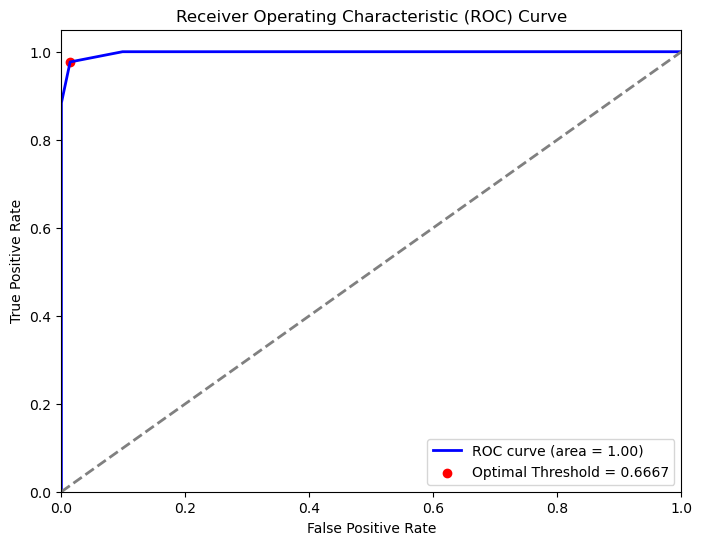

In [656]:
# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### __Observation:__

- The ROC curve has a steep ascent to a high True Positive Rate with a low False Positive Rate, indicating that the classifier is effective at distinguishing between the positive and negative classes.

- The AUC value is 0.98, which is very close to 1.0. An AUC of 0.98 indicates excellent discriminatory ability, meaning the classifier is highly capable of distinguishing between the positive and negative classes.

- The optimal threshold for the KNN classifier, determined using Youden's J statistic, is 0.33.

### __Hyperparameter Tuning in KNN:__

The Number of Neighbors (k) is a crucial hyperparameter in the K-Nearest Neighbors (KNN) algorithm. It specifies how many nearest neighbors the algorithm should consider when making predictions. The selection of 𝑘 impacts the model's ability to generalize effectively: a smaller 𝑘 can make the model sensitive to noise in the data, potentially leading to overfitting, while a larger 𝑘 might include less relevant neighbors, possibly causing underfitting. Therefore, choosing the right 𝑘 value is essential for balancing bias and variance in the model.

### __Using GridSearchCV with Cross-Validation to find optimal 'k':__

The optimal number of neighbors is 7
The best cross-validated accuracy is 0.9713526570048309


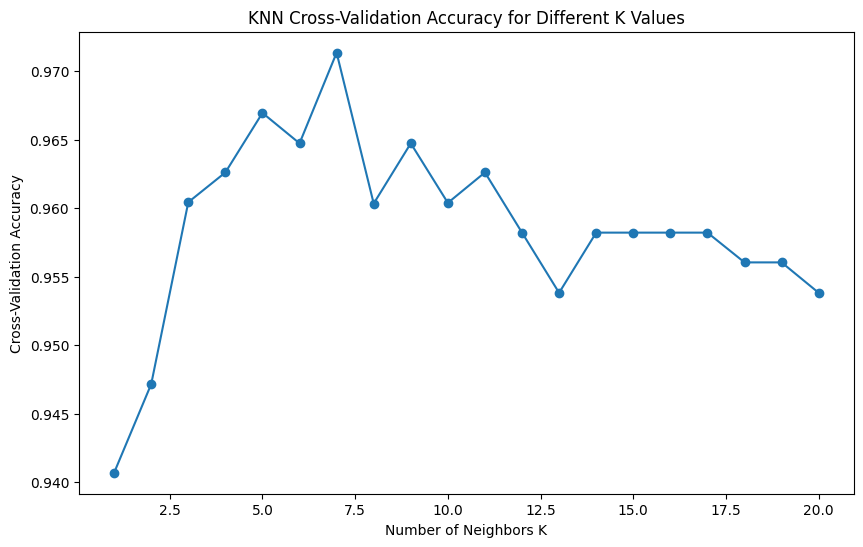

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'knn__n_neighbors': np.arange(1, 21)}

# Create a pipeline with a scaler and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Standardize the data
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best k value
optimal_k = grid_search.best_params_['knn__n_neighbors']
print(f"The optimal number of neighbors is {optimal_k}")

# Get the best score
best_score = grid_search.best_score_
print(f"The best cross-validated accuracy is {best_score}")

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Plot the cross-validation accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.show()

**Note**: Ideally, you can use the optimal `k=7` to run knn to check if the results have improved or not

## __Decision Tree__

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks.
- It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes.
- Decision trees are used for classification and regression tasks, providing easy-to-understand models.

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

The following diagram demonstrates the different parts of a decision tree:

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/5.02node.png" width=500 height=500 />

- The tree-like structure consists of nodes, branches, and leaves.
- A node represents a place where a question is asked or an attribute is selected.
- The leaves represent the output or class label.

- **Root Node:** This is the top node of the tree, from which the decision-making process begins. It represents the entire dataset and is split into two or more child nodes based on the feature that provides the best split.
- **Decision Node:** These are intermediate nodes in the tree that represent a decision based on a feature's value. Each decision node splits the dataset into smaller subsets based on a specific feature and its value.
- **Leaf Node:** These are the endpoints of the decision tree branches. They represent the final decision or outcome. A leaf node does not split further and contains the predicted outcome or class label.

Example: The following decision tree diagram represents the criteria for buying a car based on its color, model year, and mileage.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/DT.png" width=500 height=500 />


### __How Decision Trees Work__

Creating a decision tree involves a series of steps aimed at systematically breaking down the dataset based on its features to achieve the best possible classification or prediction. Here's an overview of the process:

- **Selecting the Best Attribute:** The first step is to choose the attribute that best splits the data using metrics such as *Gini impurity, entropy*, and *information gain*.

- **Splitting the Dataset:** The dataset is then divided into subsets based on the values of the selected attribute.

- **Repeating the Process:** This process is repeated recursively for each subset, creating new internal nodes or leaf nodes until a stopping criterion is met. This criterion can be that all instances in a node belong to the same class, or a predefined depth of the tree is reached.

### __Metrics for Splitting__

- **Gini Impurity:** Gini impurity is a measure of the impurity or disorder in a set of elements, commonly used in decision tree algorithms. This metric measures the likelihood of incorrectly classifying a randomly chosen element if it was labeled according to the class distribution in the dataset.

  It ranges from 0 (perfect purity) to 0.5 (maximum impurity in a binary classification problem). The formula is:


$$ \text{Gini} = 1 - \sum_{i=1}^{n} (p_i)^2 $$


  where 𝑝𝑖 is the probability of an instance being classified into class 𝑖


- **Entropy:** Entropy quantifies the amount of uncertainty or impurity in the dataset. It is calculated as:

$$\text{Entropy} = - \sum_{i=1}^{n} p_i \log_2(p_i)$$


  where 𝑝𝑖 is the probability of an instance being classified into class 𝑖


- **Information Gain:** This metric measures the reduction in entropy or Gini impurity after the dataset is split on an attribute. It is given by:

$$
\text{Information Gain} = \text{Entropy(parent)} - \sum_{i=1}^{n} \left( \frac{|D_i|}{|D|} \times \text{Entropy}(D_i) \right)
$$

  where 𝐷𝑖 is the subset of 𝐷, after being split by an attribute

### __Advantages of Decision Tree__

- **Simplicity and Interpretability:** Decision trees are straightforward to understand and interpret. Their visual representation is intuitive and closely mimics human decision-making processes.
- **Versatility:** They can be applied to both classification and regression tasks, making them highly versatile.
- **No Need for Feature Scaling:** Decision trees inherently handle data without requiring normalization or scaling.
- **Handles Non-linear Relationships:** They are capable of capturing and modeling complex non-linear relationships between features and the target variable.

### __Disadvantages of Decision Tree__

- **Overfitting:** Decision trees can easily overfit the training data, particularly if they grow very deep with many nodes.
- **Instability:** Small changes in the training data can result in significant differences in the structure of the tree, leading to instability.
- **Bias towards Features with More Levels:** Attributes with a greater number of levels can disproportionately influence the tree structure, potentially leading to biased results.

## __4.5.3 Pruning__
To address the issue of overfitting, decision trees can be pruned. Pruning involves removing parts of the tree that do not provide significant power in classifying instances. This can be done in two main ways:

- **Pre-pruning (Early Stopping):** Halts the growth of the tree early based on a stopping criterion such as maximum depth or minimum number of samples required to split a node.

- **Post-pruning:** First grows the full tree and then removes nodes that add little predictive power to reduce complexity and improve generalization.

## __4.5.4 Applying Decision Tree on Breast Cancer Dataset__


In [34]:
#Import Required Libraries and apply decision tree
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize the data
    ('dt', DecisionTreeClassifier()) # Decision Tree classifier
])
pipeline.fit(x_train, y_train)

# Predict on the training and testing set
y_pred_train_dt = pipeline.predict(x_train)
y_pred_test_dt = pipeline.predict(x_test)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_dt)
testing_accuracy = accuracy_score(y_test, y_pred_test_dt)
print("\nDecision Trees")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_dt = pipeline.predict_proba(x_test)[:, 1]



Decision Trees
Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


In [35]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_dt,
    'Predicted Probability': y_pred_prob_dt
})

results_df.head()

,Actual Label,Predicted Label,Predicted Probability
204,0,0,0.0
70,1,1,1.0
131,1,1,1.0
431,0,0,0.0
540,0,0,0.0


### __Observation:__
- Training accuracy indicates that the decision tree model perfectly classifies the training data. This is a strong indicator of overfitting, where the model is too complex and captures noise in the training data, resulting in perfect accuracy.
- The testing accuracy, while still high, is lower than the training accuracy. This difference indicates that the model does not generalize as well to unseen data as it does to the training data, reinforcing the possibility of overfitting.

When there is a significant difference between training and testing accuracy (as seen with training accuracy at 1.0 and testing accuracy at 92%), it suggests that the model might be overfitting to the training data. Cross-validation helps confirm this by showing how the model performs on different subsets of the data.

- The primary goal of cross-validation is to assess how well the model generalizes to independent datasets. A model that performs well on cross-validation is more likely to generalize well to new, unseen data.

- Cross-validation helps in understanding the stability of the model’s performance. If the cross-validation scores vary significantly, it indicates that the model's performance is inconsistent and may depend heavily on the specific train-test split.

**Using cross_val_score with the pipeline and training data**

When using a pipeline, `cross_val_score` ensures that all steps in the pipeline (like scaling and model fitting) are applied consistently during each fold of the cross-validation process.

In [36]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.9010989  0.91208791 0.93406593 0.91208791 0.92307692]
Mean CV Score: 0.9164835164835164


-  The cross-validation scores are relatively consistent, with accuracies ranging from approximately 91.21% to 94.51%. This consistency indicates that the model is robust and performs well across different subsets of the data.

- The mean cross-validation score of approximately 92.31% suggests that the model generalizes well to unseen data, providing a reliable measure of its performance.

- Using cross-validation helps ensure that the performance estimate is not overly optimistic or pessimistic, giving a balanced view of the model's effectiveness.

Confusion Matrix:
[[68  3]
 [ 3 40]]


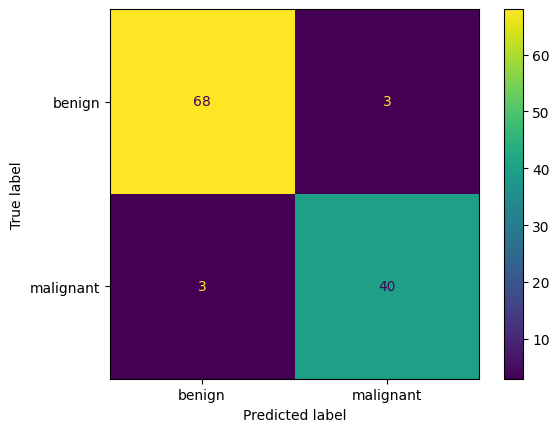

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Print confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_dt, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()


**True Positives (TP)**: The model correctly predicted 39 instances as malignant when they were indeed malignant.

**True Negatives (TN)**: The model correctly predicted 67 instances as benign when they were indeed benign.

**False Positives (FP)**: The model incorrectly predicted 4 instances as malignant when they were actually benign. This is a type I error.

**False Negatives (FN)**: The model incorrectly predicted 4 instances as benign when they were actually malignant. This is a type II error.


In [38]:
# Print classification report
print("Decision Trees Classification Report:")
print(classification_report(y_test, y_pred_test_dt))

Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### __Observation__

**Decision Trees Classification Report**

The classification report provides a detailed performance evaluation of the Decision Tree classifier on the test dataset. It includes various metrics: precision, recall, F1-score, and support for each class, along with overall metrics such as accuracy, macro average, and weighted average.

**Metrics for Each Class:**

**Class 0 (Benign):**
- **Precision: 0.94**
  - **Meaning**: Of all the instances predicted as class 0, 94% were correctly classified. Precision measures the accuracy of the positive predictions.
- **Recall: 0.94**
  - **Meaning**: Of all the actual instances of class 0, 94% were correctly identified by the model. Recall measures the model's ability to find all the relevant cases within a class.
- **F1-Score: 0.94**
  - **Meaning**: The F1-score is the harmonic mean of precision and recall. An F1-score of 0.94 indicates a good balance between precision and recall for class 0.
- **Support: 71**
  - **Meaning**: There are 71 instances of class 0 in the test dataset.

**Class 1 (Malignant):**
- **Precision: 0.91**
  - **Meaning**: Of all the instances predicted as class 1, 91% were correctly classified.
- **Recall: 0.91**
  - **Meaning**: Of all the actual instances of class 1, 91% were correctly identified by the model.
- **F1-Score: 0.91**
  - **Meaning**: An F1-score of 0.91 indicates a good balance between precision and recall for class 1.
- **Support: 43**
  - **Meaning**: There are 43 instances of class 1 in the test dataset.

**Overall Metrics:**

- **Accuracy: 0.93**
  - **Meaning**: The overall accuracy of the model is 93%, indicating that 93% of the total instances in the test dataset were correctly classified by the model.

**Macro Average:**
- **Precision: 0.93**
- **Recall: 0.93**
- **F1-Score: 0.93**
  

**Weighted Average:**
- **Precision: 0.93**
- **Recall: 0.93**
- **F1-Score: 0.93**
  


Optimal Threshold: 1.0000


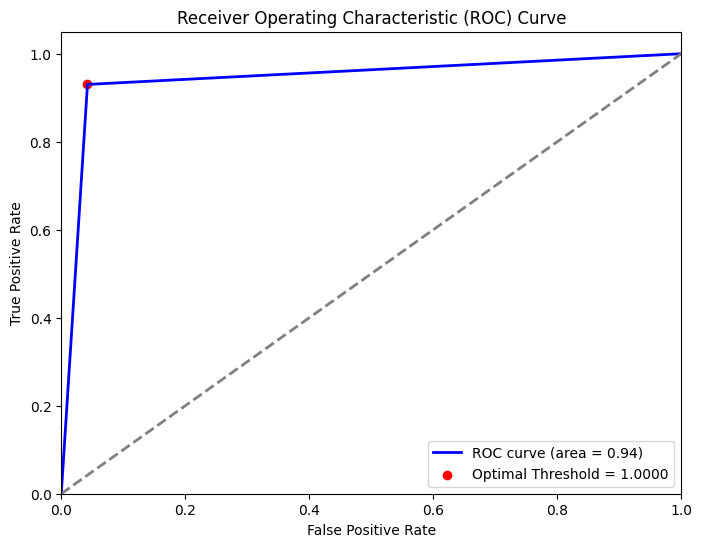

In [39]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### __Observation__

- High AUC: The AUC of 0.93 demonstrates that the Decision Tree model has a strong ability to differentiate between the positive and negative classes.

- Optimal Threshold: The optimal threshold of 1.0000 is identified as the point that maximizes the model's effectiveness in distinguishing between classes, balancing the trade-offs between TPR and FPR.

### __Pruning of Decision tree:__

 - By pruning a decision tree, we aim to improve the generalization of the model, thereby avoiding overfitting.

- Let's apply pruning to the decision tree and then evaluate the model's performance:

- `ccp_alpha` in `DecisionTreeClassifier` is the complexity parameter used for Minimal Cost-Complexity Pruning.
- This parameter controls the amount of pruning applied. Higher values of ccp_alpha result in more pruning.

In [40]:
# Create a pipeline with a standard scaler and a pruned decision tree classifier
pipeline_pruned = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('dt', DecisionTreeClassifier(ccp_alpha=0.01, random_state=42))  # Pruned Decision Tree classifier
])

# Perform cross-validation
cv_scores_pruned = cross_val_score(pipeline_pruned, x_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores (Pruned): {cv_scores_pruned}")
print(f"Mean CV Score (Pruned): {cv_scores_pruned.mean()}")

# Train the pruned pipeline on the training data
pipeline_pruned.fit(x_train, y_train)

# Predict on the training and testing set
y_pred_train_dt_pruned = pipeline_pruned.predict(x_train)
y_pred_test_dt_pruned = pipeline_pruned.predict(x_test)

# Calculate training and testing accuracy for the pruned model
training_accuracy_pruned = accuracy_score(y_train, y_pred_train_dt_pruned)
testing_accuracy_pruned = accuracy_score(y_test, y_pred_test_dt_pruned)
print("\nPruned Decision Trees")
print(f"Training Accuracy: {training_accuracy_pruned}")
print(f"Testing Accuracy: {testing_accuracy_pruned}")

Cross-Validation Scores (Pruned): [0.92307692 0.91208791 0.94505495 0.93406593 0.93406593]
Mean CV Score (Pruned): 0.9296703296703297

Pruned Decision Trees
Training Accuracy: 0.9802197802197802
Testing Accuracy: 0.956140350877193


In [41]:
# Predict probabilities for ROC-AUC calculation
y_pred_prob_dt_pruned = pipeline_pruned.predict_proba(x_test)[:, 1]

In [42]:
# Print confusion matrix and classification report
conf_matrix_pruned = confusion_matrix(y_test, y_pred_test_dt_pruned)
print("Confusion Matrix (Pruned):")
print(conf_matrix_pruned)

print("Pruned Decision Trees Classification Report:")
print(classification_report(y_test, y_pred_test_dt_pruned))

Confusion Matrix (Pruned):
[[69  2]
 [ 3 40]]
Pruned Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Optimal Threshold (Pruned): 0.8462


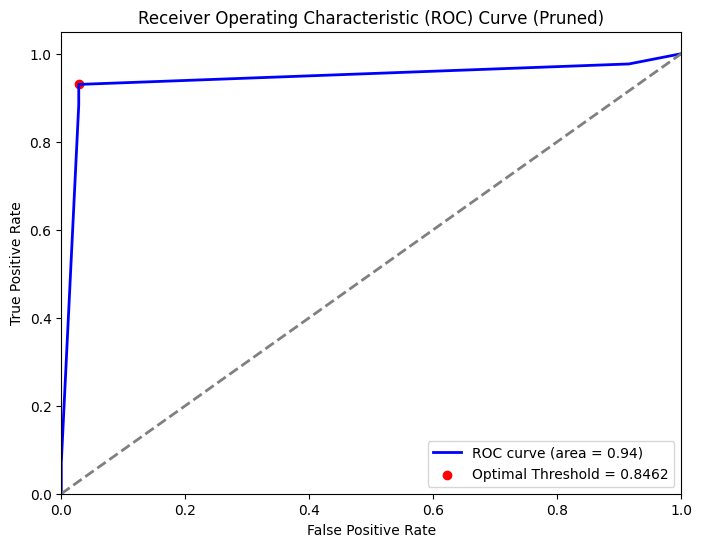

In [43]:
fpr_pruned, tpr_pruned, thresholds_pruned = roc_curve(y_test, y_pred_prob_dt_pruned)
roc_auc_pruned = auc(fpr_pruned, tpr_pruned)

# Compute Youden's J statistic for each threshold
youden_j_pruned = tpr_pruned - fpr_pruned
optimal_threshold_index_pruned = np.argmax(youden_j_pruned)
optimal_threshold_pruned = thresholds_pruned[optimal_threshold_index_pruned]

print(f"Optimal Threshold (Pruned): {optimal_threshold_pruned:.4f}")

# Plot ROC curve with the optimal threshold marked for the pruned model
plt.figure(figsize=(8, 6))
plt.plot(fpr_pruned, tpr_pruned, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_pruned:.2f})')
plt.scatter(fpr_pruned[optimal_threshold_index_pruned], tpr_pruned[optimal_threshold_index_pruned], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold_pruned:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Pruned)')
plt.legend(loc='lower right')
plt.show()

### __Observation:__

- Pruning the decision tree has successfully reduced overfitting, as indicated by the reduced training accuracy and improved testing accuracy.
- The pruned model shows more consistent cross-validation performance, indicating better stability and generalization.
- The overall classification metrics remain high, demonstrating that the pruned model maintains strong performance while avoiding the pitfalls of overfitting.

### __4.5.5 Hyperparameter Tuning in Decision Tree__:

Hyperparameter tuning is a critical step in optimizing the performance of a Decision Tree model. The process involves selecting the best set of hyperparameters that maximize the model's performance. Here’s an overview of key hyperparameters in a Decision Tree, their impact, and common tuning techniques:

**Key Hyperparameters:**

1. **max_depth:**
The maximum depth of the tree. It controls the maximum number of splits from the root to a leaf.

  Impact: Limiting the depth can prevent overfitting (by reducing the model complexity) and underfitting (by ensuring the tree is deep enough to capture the data patterns).

2. **min_samples_split:**
The minimum number of samples required to split an internal node.

  Impact: Higher values prevent the model from learning overly specific patterns (overfitting) by requiring a minimum number of samples to make a split.

3. **min_samples_leaf:**
The minimum number of samples required to be at a leaf node.

  Impact: Setting this parameter can ensure that leaf nodes have enough samples to represent meaningful data patterns.

4. **max_features:**
The number of features to consider when looking for the best split.

  Impact: Reducing the number of features considered can reduce overfitting and computation time, but too few features might miss important information.

5. **ccp_alpha:**
Complexity parameter used for Minimal Cost-Complexity Pruning. It controls the amount of pruning applied.

  Impact: Higher values of ccp_alpha result in more pruning, which can simplify the model and reduce overfitting.

6. **criterion:**
The function to measure the quality of a split (e.g., "gini" for Gini impurity and "entropy" for Information Gain).

  Impact: The choice of criterion can influence the tree structure and performance

**Hyperparameter Tuning Techniques:**

1. **Grid Search:** An exhaustive search over a specified parameter grid.

  **Implementation:** Using GridSearchCV in scikit-learn to evaluate all combinations of hyperparameter values.


2. **Random Search:** A random search over a specified parameter grid.

  **Implementation:** Using RandomizedSearchCV in scikit-learn to sample a fixed number of parameter settings from the specified grid.

#### __Implementation of hyperparameter tuning using Grid Search Technique:__

**Explanation of `param_grid` for performing GridSearchcv:**

- **'dt__max_depth'**:
  - **Values**: `[None, 10, 20, 30]`
  - **Meaning**: The maximum depth of the decision tree. If `None`, the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples. Specific values (10, 20, 30) limit the depth of the tree to control its complexity and prevent overfitting.

- **'dt__min_samples_split'**:
  - **Values**: `[2, 5, 10]`
  - **Meaning**: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns by requiring more samples for a split.

- **'dt__min_samples_leaf'**:
  - **Values**: `[1, 2, 4]`
  - **Meaning**: The minimum number of samples required to be at a leaf node. This parameter ensures that leaf nodes have a minimum number of samples, which helps prevent overfitting.

- **'dt__max_features'**:
  - **Values**: `[None, 'sqrt', 'log2']`
  - **Meaning**: The number of features to consider when looking for the best split:
    - `None`: Consider all features.
    - `'sqrt'`: Consider the square root of the total number of features.
    - `'log2'`: Consider the base-2 logarithm of the total number of features.
  - This parameter helps to reduce overfitting by considering fewer features.

- **'dt__ccp_alpha'**:
  - **Values**: `[0.0, 0.01, 0.1]`
  - **Meaning**: Complexity parameter used for Minimal Cost-Complexity Pruning. It controls the amount of pruning applied:
    - `0.0`: No pruning.
    - `0.01` and `0.1`: Apply pruning with increasing intensity, potentially reducing model complexity and preventing overfitting.

**Purpose:**

The `param_grid` dictionary is used by `GridSearchCV` to perform an exhaustive search over these hyperparameter values. `GridSearchCV` will train the model for each combination of the specified hyperparameters and evaluate their performance using cross-validation.

In [44]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('dt', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__max_features': [None, 'sqrt', 'log2'],
    'dt__ccp_alpha': [0.0, 0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Predict on the testing set with the best estimator
y_pred = grid_search.best_estimator_.predict(x_test)

# Calculate and print the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy}")

Best Parameters: {'dt__ccp_alpha': 0.0, 'dt__max_depth': None, 'dt__max_features': 'log2', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best Cross-Validation Score: 0.9406593406593406
Testing Accuracy: 0.956140350877193


##__4.6 Support Vector Machine (SVM)__##


It is a supervised machine-learning algorithm used for both classification and regression challenges. It is mainly utilized for classification-related problems.



* In support vector machine, the required straight line to fit the data is called the hyperplane.
* The goal of the Support Vector Machine algorithm is to find a hyperplane in an n-dimensional space that distinctly classifies the data points.
* The closest data points to the hyperplane on either side are called Support Vectors.
* These support vectors influence the position and orientation of the hyperplane, aiding in the construction of the SVM.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/SVM.png)

**There are two types of support vector machines:**

- **Linear SVM** separates the data in a linear format.
If the data set is separated into two using a straight line, the data is linearly separable.


- **Nonlinear SVM** is used when data is nonlinearly separated. If the dataset cannot be separated into two using a straight line, the data is nonlinear.


## __4.6.1 Applying SVM on Breast Cancer Dataset__

In [45]:
# Import necessary libraries
from sklearn.svm import SVC

# Create a pipeline with a standard scaler and an SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(probability=True, random_state=42))  # SVM classifier with probability estimates
])

# Train the pipeline on the training data
pipeline_svm.fit(x_train, y_train)

# Predict on the training and testing set
y_pred_train_svm = pipeline_svm.predict(x_train)
y_pred_test_svm = pipeline_svm.predict(x_test)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_svm)
testing_accuracy = accuracy_score(y_test, y_pred_test_svm)
print("\nSupport Vector Machines (SVM)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

# Predict probabilities for the test set
y_pred_prob_svm = pipeline_svm.predict_proba(x_test)[:, 1]



Support Vector Machines (SVM)
Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9824561403508771


In [46]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_svm,
    'Predicted Probability': y_pred_prob_svm
})

results_df.head()

,Actual Label,Predicted Label,Predicted Probability
204,0,0,0.020564
70,1,1,1.000000
131,1,1,0.999992
431,0,0,0.000158
540,0,0,0.000062


Confusion Matrix:
[[71  0]
 [ 2 41]]


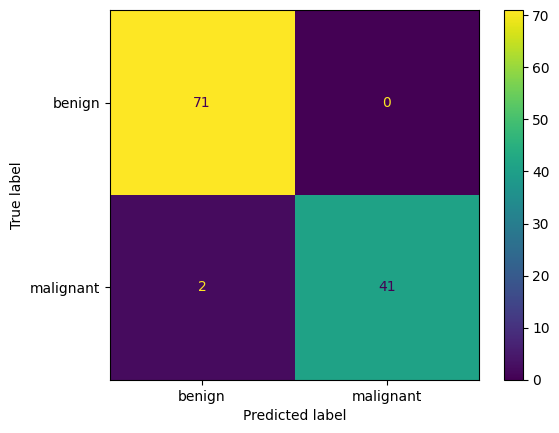

In [47]:
# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()



In [48]:
# Print classification report
print("\t\tSupport Vector Machines Classification Report:")
print("\t\t------------------------------------------")
print(classification_report(y_test, y_pred_test_svm))

		Support Vector Machines Classification Report:
		------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Note: Encourage the learners to deduce results from the Classification report and ROC curve**

Optimal Threshold: 0.6821


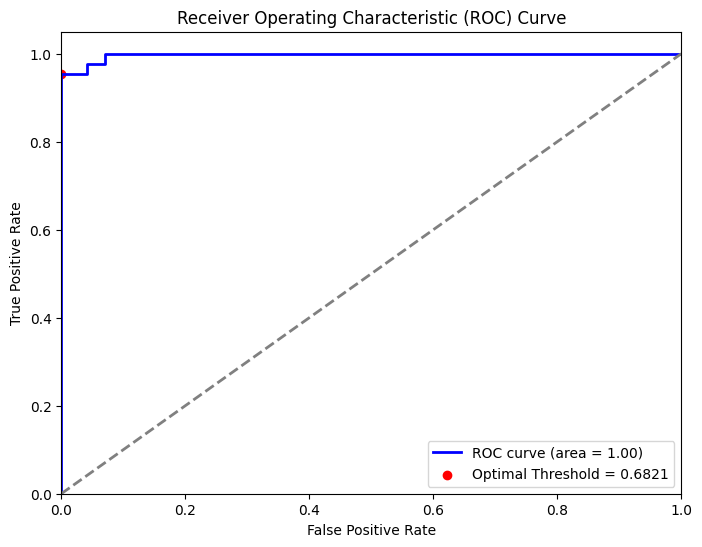

In [49]:
# Plot ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### __4.6.2 Hyperparameter Tuning:__

In Support Vector Machines (SVM), hyperparameters play a crucial role in determining the model's performance. Here are some key hyperparameters typically adjusted in SVM:

- **Kernel Type:** The kernel function transforms the input data into a higher-dimensional space where a hyperplane can be used to separate classes that are not linearly separable in the original space. Common kernels include:

  * Linear: No transformation is done; suitable for linearly separable data.
  * Polynomial: Transforms data by considering polynomial combinations of the features.
  * Radial Basis Function (RBF): Exploits the distance between the feature vectors in a radial basis.

Sigmoid: Uses a sigmoid function to transform data.

- **C (Regularization Parameter):** This parameter trades off correct classification of training examples against maximization of the decision function’s margin. A higher C tries to classify all training examples correctly (low bias but high variance), while a lower C allows more misclassifications but pushes for a larger margin (high bias but low variance).

- **Gamma (γ):** This hyperparameter is used with certain types of kernels like the RBF, where it defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. The gamma parameter can be crucial in avoiding overfitting or underfitting in the SVM model.

**Note:** You have seen hyperparameter tuning for KNN and decision trees. Now, using that approach, take one hyperparameter and tune it as practice for SVM.

## __Conclusion:__

Classification is a vital technique in supervised machine learning that focuses on identifying categorical outcomes based on given inputs. In this series of lessons, you have engaged with the core principles of classification, including its various types and applications across different sectors such as healthcare, finance, and retail.

You have been introduced to several key classification algorithms including Logistic Regression, Naive Bayes, K-Nearest Neighbors, Decision Trees, and Support Vector Machines. Each method was explored through theoretical discussions and practical examples, particularly using the Breast Cancer dataset to illustrate real-world application.

Furthermore, you have learned to assess the effectiveness of these classification models using performance metrics such as accuracy, precision, recall, and the F1-score, alongside more comprehensive evaluations like ROC curves and confusion matrices. Issues like overfitting and model tuning were addressed, enhancing your understanding of how to optimize model performance through hyperparameter adjustments.